In [1]:
# !pip install -Uqq tensorflow==2.8.0
# from tensorflow import keras
# !pip install Keras-Preprocessing

In [2]:
from os import path, remove
from random import randint
from PIL import Image
from tensorflow.keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
from tensorflow import expand_dims
from keras.models import load_model

In [3]:
def get_model(model_path: str):
    return load_model(model_path)

In [4]:
def get_model_summary(model):
    model_summary_string = []
    model.summary(print_fn=lambda x: model_summary_string.append(x), line_length=78)

    return '\n'.join(model_summary_string)

In [5]:
def model_prediction(image_path: str, model):

    img = load_img(image_path, target_size=(300, 300))
    img_array = img_to_array(img)
    img_array = expand_dims(img_array / 255, 0)

    sigmoid_threshold = 0.423
    prediction = model.predict(img_array)[0][0]

    classes = ['Real Face', 'Fake Face']
    label = classes[0] if prediction > sigmoid_threshold else classes[-1]

    classes_probability = _prediction_probability(prediction, label, classes)

    real_face_probability = classes_probability['Real Face']
    fake_face_probability = classes_probability['Fake Face']

    return label, real_face_probability, fake_face_probability

In [6]:
def _prediction_probability(prediction: float, prediction_label: str, prediction_classes: list):

    prediction_classes.remove(prediction_label)
    prediction_prob = max(prediction, 1 - prediction)

    probabilities = {
        prediction_label: round(prediction_prob * 100),
        prediction_classes[0]: round((1 - prediction_prob) * 100)
    }

    return probabilities

In [7]:
def imShow(path):
    import cv2
    import matplotlib.pyplot as plt
    %matplotlib inline

    image = cv2.imread(path)
    height, width = image.shape[:2]
    resized_image = cv2.resize(image,(width, height), interpolation = cv2.INTER_CUBIC)

    fig = plt.gcf()
    fig.set_size_inches(12, 4)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.show()

In [8]:
model_path = 'assets/model/model.hdf5'
model = load_model(model_path)

In [9]:
model_cnn = get_model(path.join('assets/model', 'model.hdf5'))
model_summary = get_model_summary(model_cnn)

In [17]:
prediction_label, real_face_prob, fake_face_prob = model_prediction('assets/faces/4.jpg', model_cnn)

1/1 [==============================] - 0s 61ms/step


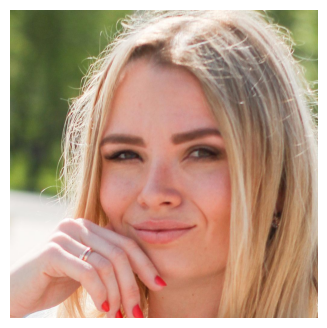

Probability of real face:  78 %
Probability of fake face:  22 %


This is a Real Face


In [18]:
imShow('assets/faces/4.jpg')
print('Probability of real face: ',real_face_prob,'%')
print('Probability of fake face: ', fake_face_prob,'%')
print('\n\nThis is a',prediction_label)